In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

# Writer

In [5]:
folder_path = '/home/cmsdaq/Analysis/Data/RUN_1/raw_data'   # location of the txt folder (raw data)
save_path = '/tmp/'           # where to save the hdf5 file (.scan)
run_number = 1                                 # number of run
# the file will be saved with the name "BAW_1_1.scan" if it is the only file in save_path. Otherwise, if
# the are already files with the name "BAW_1_n.scan" the name will be "BAW_1_X.scan" with X = max(n)+1. 

In [6]:
writer = scan_handler.ScanWriter(run_number,save_path)  # create the object

In [7]:
# write general info for the run
writer.set_general_info(data='27_03_2023',T_baw = 0.740, N_baw = 27,raw_data_path=folder_path,
                        Note = 'nota a cazzo di cane') 

In [8]:
# create the file from the raw data in folder_path. The raw data are named Zoomed*.dat
writer.write_resonances(path=folder_path,file_name = 'Zoomed', desin='.dat')

In [9]:
# This can be useful in custom scripts
# Save a parameter (Q) inside the resonance called "resonance_10" with the value 55. You can save array also.
writer.save_parameter('data/resonance_10/parameters','Q',55)

In [ ]:
# This can be useful in custom scripts
# Delete a parameter (Q) inside the resonance called "resonance_10".
writer.delete_parameter('data/resonance_10/parameters','Q')

# Reader

In [25]:
file_path = "/home/cmsdaq/Analysis/Data/RUN_1/processed_data/BAW_1_4.scan"    # path to the .scan file
reader = scan_handler.ScanReader(file_path)        # create the object

In [26]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['Q', 'asim', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'f_center', 'gamma', 'ifbw', 'input_power', 'norm']


In [24]:
# get the parameter Q for all the resonances as an array
reader.get_parameters('Q')

array([55])

In [17]:
# get (as a python dictionary) all the resonance parameter. 
# you can get a resonance from its raw name
#           reader.get_resonance(name="resonance_10")
# you can get a resonance from its position inside the .scan
# e.g.: get the seventh resonance
#           reader.get_resonance(loc=7)
# you can get the resonance from its frequency (the middle frequency). 
# it gets the closest resonance to the selected frequency

resonance = reader.get_resonance(freq=5.175e6)

In [18]:
for key in resonance.keys():
    print(key)
print("The resonance called ",resonance['reso_name'] ," has a Q = ", resonance['Q'])

Q
asim
depth
er_Q
er_asim
er_f0
er_gamma
er_norm
f0
f_center
gamma
ifbw
input_power
norm
freq
power
reso_name
The resonance called  resonance_11  has a Q =  5983990.533396735


## Useful(?) examples

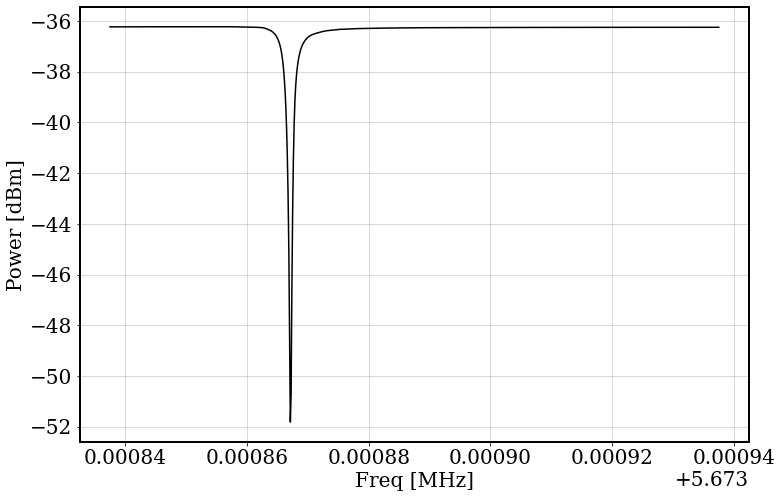

In [19]:
# plot the resonance at 5.66 MHz
reso = reader.get_resonance(freq=5.66e6)

plt.plot(reso['freq']*1e-6,reso['power'],c='k')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

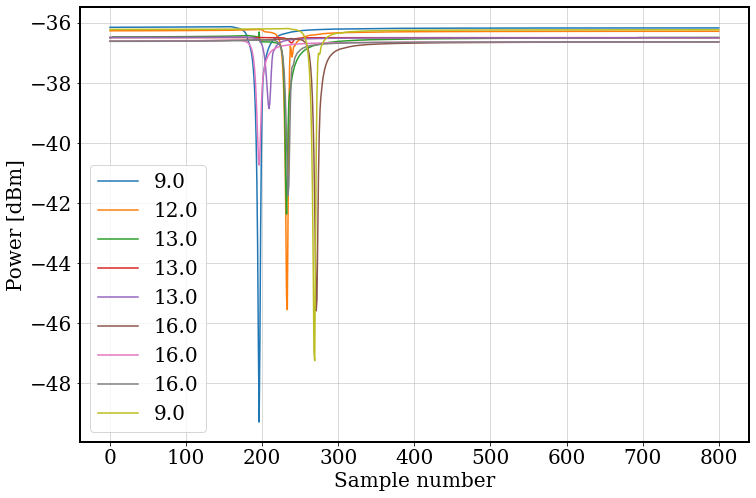

In [20]:
# plot all the resonance with a Q greater than 1e7
Q = reader.get_parameters('Q')
loc = np.where(Q>=1e7)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    f0 = reader.get_resonance(loc=l)['f0']
    plt.plot(power,label=str(np.round(f0)))
    
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

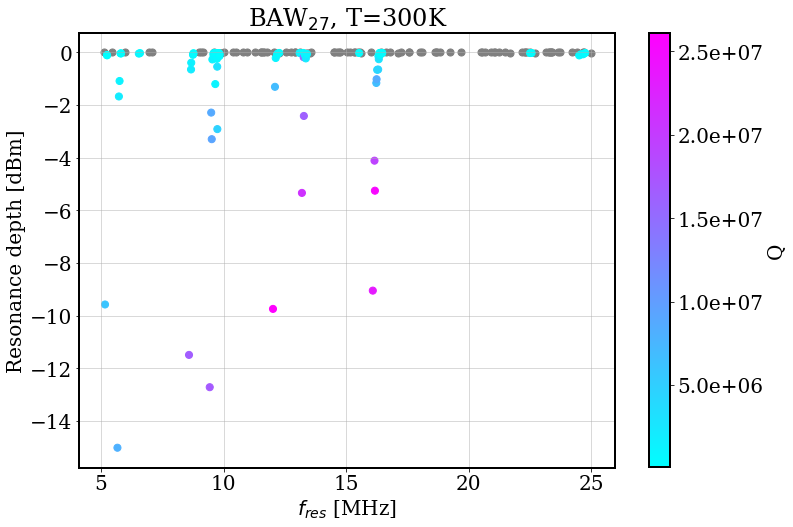

In [21]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')


depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where(Q != -2)[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig = plt.figure()
ax = fig.add_subplot(111)
d =ax.scatter(peak_pos[ii2],-depth[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],-depth[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('Resonance depth [dBm]')
plt.grid(alpha=0.6)
#plt.savefig('Scan_22.png')
plt.show()